In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")

In [2]:
def latex2figSize(width: float, fraction: float=1, ratio=16/9):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in / ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [3]:
LATEX_WIDTH = 517.935 # pt Beamer
figSize = latex2figSize(LATEX_WIDTH, 0.5, ratio=16/9)

fontsize = 8
fontsize_small = 6
fontsize_smaller = 6

sns.set_theme(style="whitegrid", font="sans-serif", rc={
    "figure.figsize": figSize,
    "figure.autolayout": True,
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": fontsize,
    "font.size": fontsize_small,
    "legend.fontsize": fontsize_smaller,
    "xtick.labelsize": fontsize_small,
    "ytick.labelsize": fontsize_small,
    "lines.linewidth": 1
})

custom_markers = {
    "markeredgewidth": 0.2,
    "markeredgecolor": "white",
    "markersize": 4
}

In [4]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',


In [6]:
openmp_scaling_df = pd.read_csv("C:\\Users\\xjose\\Desktop\\Models\\openmp_scaling.csv", sep=",")
hybrid_scaling_df = pd.read_csv("C:\\Users\\xjose\\Desktop\\Models\\hybrid_scaling.csv", sep=",")
mpi_scaling_df = pd.read_csv("C:\\Users\\xjose\\Desktop\\Models\\mpi_scaling.csv", sep=",")

In [7]:
dfs = [openmp_scaling_df, hybrid_scaling_df, mpi_scaling_df]
idx = [15, 15, 18]
openmp_scaling_df

,Dataset,Workers,Non vectorized runtime,Vectorized runtime,Standard deviation non vectorized HPDBSCAN,Standard deviation vectorized HPDBSCAN
0,Bridge,1,4221.208843,4477.380410,0.000000,0.000000
1,Bridge,2,2805.259669,2185.810655,0.000000,0.000000
2,Bridge,4,2648.102088,1130.088844,0.000000,0.000000
3,Bridge,6,1802.051171,774.242900,0.000000,0.000000
4,Bridge,8,1714.578245,537.434758,0.000000,0.000000
5,Bridge,12,1564.076134,365.288627,0.000000,0.000000
6,Bridge,16,1489.274851,279.950152,0.000000,0.000000
7,Bridge,20,1663.855381,233.339564,0.000000,0.000000
8,Bridge,24,1869.842231,197.553025,0.000000,0.000000
9,Bridge,28,1577.652366,175.591789,0.000000,0.000000


In [15]:
new_dfs = []
for df, i in zip(dfs, idx):
    bremen_mask = df["Dataset"] == "Bremen"
    household_mask = df["Dataset"] == "Household"
    bridge_mask = df["Dataset"] == "Bridge"

    df["Speedup nv"] = 0.0
    df["Speedup v"] = 0.0
    df.loc[bremen_mask, "Speedup nv"] = df.loc[0, "Non vectorized runtime"] / df.loc[bremen_mask, "Non vectorized runtime"] 
    df.loc[bremen_mask, "Speedup v"] = df.loc[0, "Vectorized runtime"] / df.loc[bremen_mask, "Vectorized runtime"] 
    df.loc[household_mask, "Speedup nv"] = df.loc[i, "Non vectorized runtime"] / df.loc[household_mask, "Non vectorized runtime"] 
    df.loc[household_mask, "Speedup v"] = df.loc[i, "Vectorized runtime"] / df.loc[household_mask, "Vectorized runtime"]
    df.loc[bridge_mask, "Speedup nv"] = df.loc[0, "Non v ectorized runtime"] / df.loc[bridge_mask, "Non vectorized runtime"] 
    df.loc[bridge_mask, "Speedup v"] = df.loc[0, "Vectorized runtime"] / df.loc[bridge_mask, "Vectorized runtime"]

    non_vect = df.loc[:,["Dataset", "Workers", "Non vectorized runtime", "Standard deviation non vectorized HPDBSCAN", "Speedup nv"]]
    non_vect.rename(columns={"Non vectorized runtime": "Runtime [$s$]", "Standard deviation non vectorized HPDBSCAN": "Std $\sigma$", "Speedup nv": "Speedup"}, inplace=True)
    non_vect["Optimization"] = "Not vectorized"
    vect = df.loc[:,["Dataset", "Workers", "Vectorized runtime", "Standard deviation vectorized HPDBSCAN", "Speedup v"]]
    vect["Optimization"] = "Vectorized"
    vect.rename(columns={"Vectorized runtime": "Runtime [$s$]", "Standard deviation vectorized HPDBSCAN": "Std $\sigma$", "Speedup v": "Speedup"}, inplace=True)
    new_df = pd.concat([non_vect, vect])
    new_df["log runtime"] = np.log10(new_df["Runtime [$s$]"])
    new_dfs.append(new_df)
openmp_scaling_df, hybrid_scaling_df, mpi_scaling_df = new_dfs
mpi_scaling_df[mpi_scaling_df["Dataset"] == "Household"]



,Dataset,Workers,Runtime [$s$],Std $\sigma$,Speedup,Optimization,log runtime
18,Household,1,22908.175650,63.751014,1.000000,Not vectorized,4.359991
19,Household,32,830.138221,1.004046,27.595616,Not vectorized,2.919150
20,Household,64,430.803089,1.256375,53.175514,Not vectorized,2.634279
21,Household,96,294.719418,0.271170,77.728763,Not vectorized,2.469409
22,Household,128,227.550650,0.209874,100.672864,Not vectorized,2.357078
23,Household,160,186.924141,1.210291,122.553328,Not vectorized,2.271665
24,Household,192,157.393662,0.406664,145.547002,Not vectorized,2.196987
25,Household,224,134.657160,0.238086,170.122225,Not vectorized,2.129229
26,Household,256,118.580310,0.092698,193.187010,Not vectorized,2.074013
27,Household,288,108.286609,0.157091,211.551325,Not vectorized,2.034575


In [17]:
openmp_scaling_df[openmp_scaling_df["Dataset"] == "Bridge"]

,Dataset,Workers,Runtime [$s$],Std $\sigma$,Speedup,Optimization,log runtime
0,Bridge,1,4221.208843,0.0,1.000000,Not vectorized,3.625437
1,Bridge,2,2805.259669,0.0,1.504748,Not vectorized,3.447973
2,Bridge,4,2648.102088,0.0,1.594051,Not vectorized,3.422935
3,Bridge,6,1802.051171,0.0,2.342447,Not vectorized,3.255767
4,Bridge,8,1714.578245,0.0,2.461952,Not vectorized,3.234157
5,Bridge,12,1564.076134,0.0,2.698851,Not vectorized,3.194258
6,Bridge,16,1489.274851,0.0,2.834406,Not vectorized,3.172975
7,Bridge,20,1663.855381,0.0,2.537005,Not vectorized,3.221116
8,Bridge,24,1869.842231,0.0,2.257521,Not vectorized,3.271805
9,Bridge,28,1577.652366,0.0,2.675627,Not vectorized,3.198011


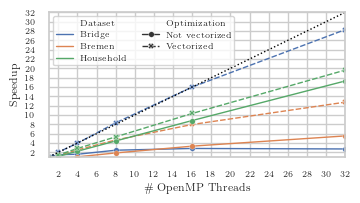

In [26]:
power_2 = [2**x for x in range(10)]
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1] ))
filter = openmp_scaling_df["Workers"].isin(power_2)
sns.lineplot(data=openmp_scaling_df[filter], x="Workers", y="Speedup", hue="Dataset", markers=True, style="Optimization", ax=axs, **custom_markers)

#ticks=[2**x for x in range(0, 8)]
ticks=[2*x for x in range(0, 48)]
plt.plot(ticks, ticks, linestyle=':', color="black", linewidth=1)
#plt.yscale('log', base=2)
#plt.xscale('log', base=2)

axs.set_xlabel("\# OpenMP Threads")
axs.set_xticks(ticks)
axs.set_yticks(ticks)
axs.set_xticklabels(ticks)
axs.set_yticklabels(ticks)
axs.set_xlim(1, 32)
axs.set_ylim(1, 32)


plt.legend(ncols=2, loc='upper left')
plt.tight_layout()
plt.savefig("openmp_scaling.pgf", backend="pgf", dpi=1200)